# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
from jupyterthemes import jtplot
jtplot.style()

## Get Training Data

In [3]:
dfx = pd.read_csv("Linear_X_Train.csv")
dfy = pd.read_csv("Linear_Y_Train.csv")

x = dfx.values
y = dfx.values

print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


## Visualise

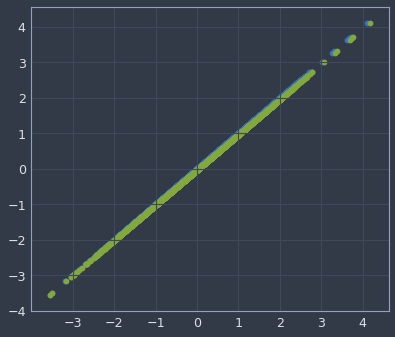

In [4]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

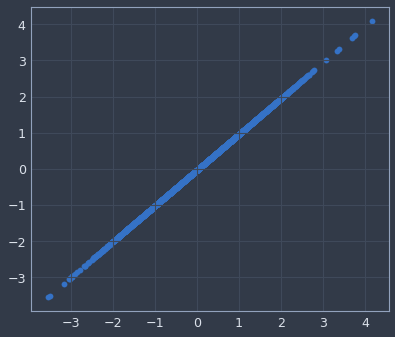

In [5]:
plt.scatter(X,Y)
plt.show()

In [6]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

In [7]:
def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    return error

In [8]:
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
    return grad

In [9]:
def gradientDescent(X,Y,learning_rate=0.0001):
    theta = np.zeros((2,))
    
    itr = 0
    max_itr=10
    
    err_list = []
    
    while(itr<=max_itr):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        err_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
    
    return theta,err_list

In [10]:
final_theta, error_list = gradientDescent(X,Y)

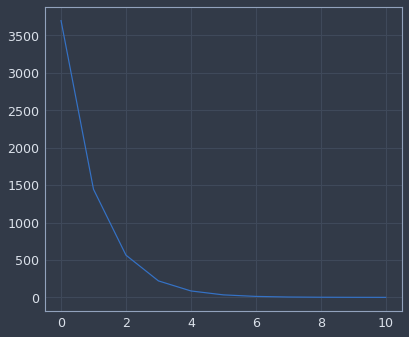

In [11]:
plt.plot(error_list)
plt.show()

In [12]:
print(final_theta)

[-0.03757982  0.98644081]


### Plot the line for testing data

In [13]:
xtest = pd.read_csv("Linear_X_Test.csv")

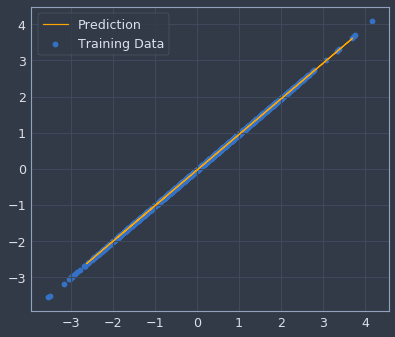

In [14]:
plt.scatter(X,Y,label="Training Data")
plt.plot(xtest,hypothesis(xtest,final_theta),color="orange",label="Prediction")
plt.legend()
plt.show()